#questions: 


In [42]:
#import libraries

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [44]:
#import file 

In [45]:
df1= pd.read_csv('netflix_dataset.csv')

In [46]:
#describe the data set

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [48]:
df1.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


Data Cleaning

In [49]:
#duplicate df
df=df1.copy()

In [50]:
#Drop dublicate shows
duplicated_shows=df.duplicated(['title','country','type','release_year'])
df[duplicated_shows]

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1134,80175351,Kakegurui,NaN,"Saori Hayami, Minami Tanaka, Tatsuya Tokutake,...",Japan,NaN,2019,TV-14,2 Seasons,"Anime Series, International TV Shows, TV Thril...",High roller Yumeko Jabami plans to clean house...,TV Show
1741,81072516,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,Movie


In [51]:
df=df.drop_duplicates(['title','country','type','release_year'])

In [52]:
#drop rows with missing values in 'date_added' Column 
df.dropna(subset=['date_added'], inplace=True)

In [53]:
#drop rows with missing values in 'country' Column 
df.dropna(subset=['country'], inplace=True)

In [54]:
#drop rows with missing values in 'rating' Column 
df.dropna(subset=['rating'], inplace=True)

In [55]:
#because NR is equal to UR in rating, we are going to use NR to refer all of the UR
for i in df.index:
    if df.loc[i,'rating']=='UR':
        df.loc[i,'rating']='NR'

The data is clean. We can start analyze now. 

1. What are the main ratings that are prevalent in Netflix 

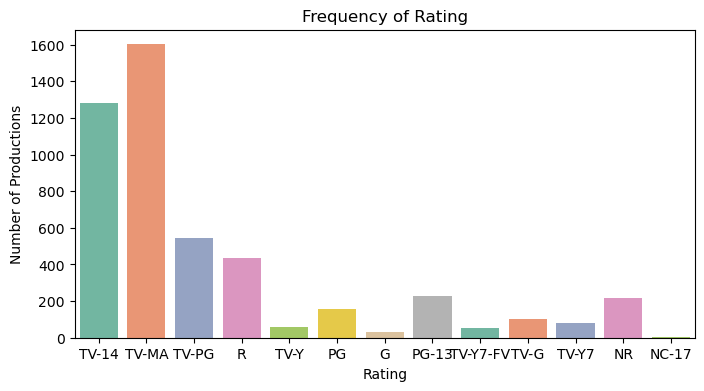

In [103]:
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=df,palette="Set2")
plt.title('Frequency of Rating')

# Add x and y labels
plt.xlabel('Rating')
plt.ylabel('Number of Productions')

plt.show()

Comment: in the distribution for rating, the top three are TV-14, TV-MA, and TV-PG. They are programs including materials that defined not suitable for children under 17, 14, or younger. The emphasis shows that Netflix has still put its main market on the adult content.

2. For further understanding, what about under the context of TV Show vs. Movie?

In [57]:
#tv show vs. movies 

In [58]:
df.type.value_counts()

type
Movie      3764
TV Show    1028
Name: count, dtype: int64

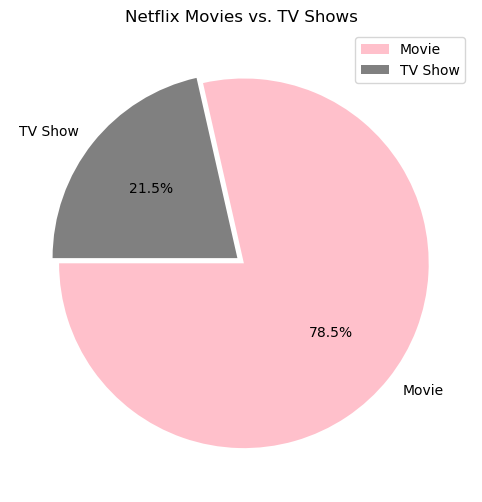

In [99]:
plt.figure(figsize=(10,6))
plt.title("Netflix Movies vs. TV Shows")
g = plt.pie(df.type.value_counts(), explode=(0.020,0.025), labels=df.type.value_counts().index, colors=['pink','grey'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

Comment: Netflix has three quarter of content concentrated on movie, while the rest of 24.2% belongs to TV show. Therefore, Netflix has much more focus on movies than shows. 

In [60]:
#spliting dataset between shows and movies
movies = df[df['type']=='Movie'].copy()
shows = df[df['type']=='TV Show'].copy()

Text(0, 0.5, 'Total Count')

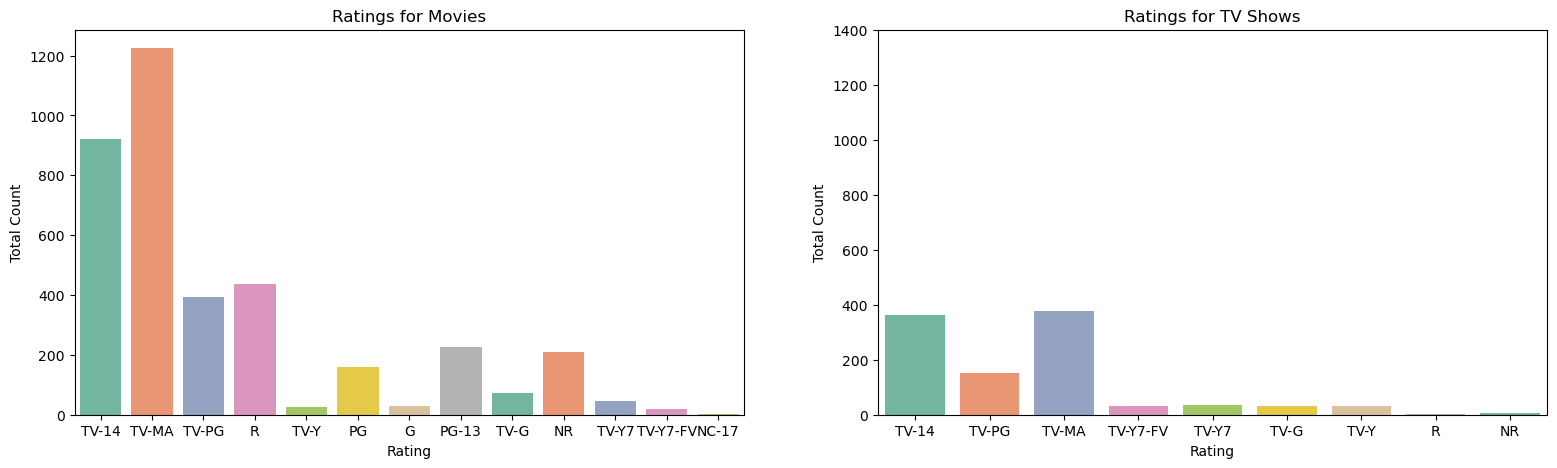

In [61]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))

# Plot for Ratings of Movies
g1 = sns.countplot(data=movies, x='rating', palette="Set2", ax=ax[0])
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")

# Plot for Ratings of TV Shows
g2 = sns.countplot(data=shows, x='rating', palette="Set2", ax=ax[1])
g2.set(yticks=np.arange(0, 1600, 200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")

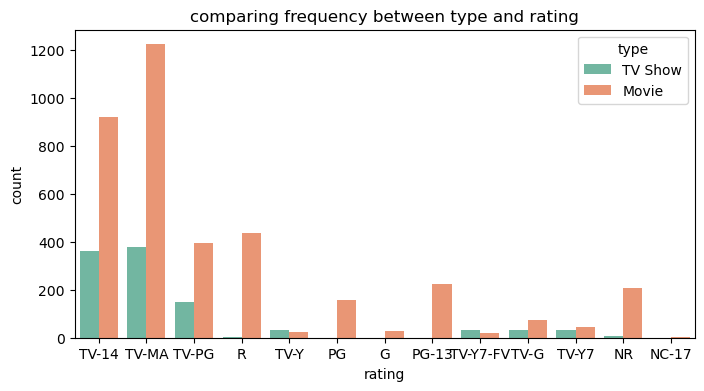

In [92]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',hue='type',data=df,palette="Set2")
plt.title('comparing frequency between type and rating')
plt.show()

Comment: under the contrast, we there is a similar trend still that Netflix put more emphasis on adult content for their audience. However, there is a consistent choice where Netflix has put more effort in bringing movies in the platform. 

The only twp exceptions here are for TV-Y7 and TV-Y7-FV. They are both programs for children age 7 and above. This could be Netflix's aiming for children's market that contains more TV shows for child education.

3. which countries has the most productions?

In [72]:
df['country'].value_counts().sort_values(ascending=False).head(10)

country
United States     1641
India              692
United Kingdom     270
Japan              122
South Korea        119
Canada             105
Spain               99
France              78
Mexico              76
Turkey              71
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Production Country')

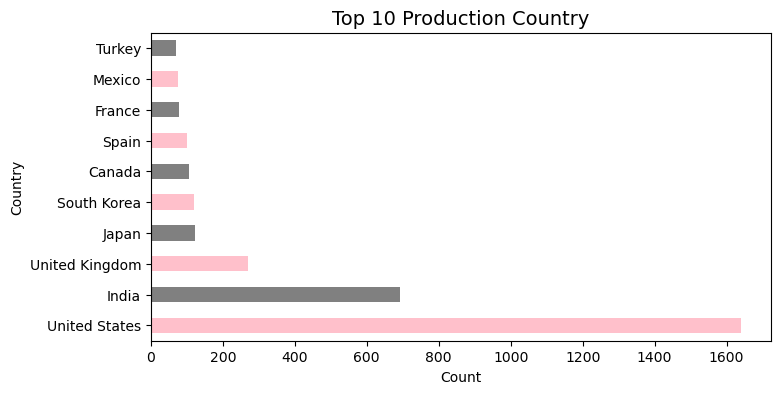

In [104]:
plt.figure(figsize=(8,4))
df['country'].value_counts().sort_values(ascending=False)[:10].plot(kind="barh",color=["pink","grey"], xlabel="Count",ylabel="Country")
plt.title('Top 10 Production Country', size=14)

Comment: from the data, we learn that the countries with the highest productions are United States, India, United Kingdom, Japan, and Korea, where the productions released in India is 50% number of United States. It shows that United States is still the primary market that Netflix targets at. 

4. How many shows has Netflix added over the years?

In [78]:
df['year'] = pd.to_datetime(df['date_added']).dt.strftime('%Y')

In [79]:
x = df.groupby(['year','type',])['rating'].count().reset_index()

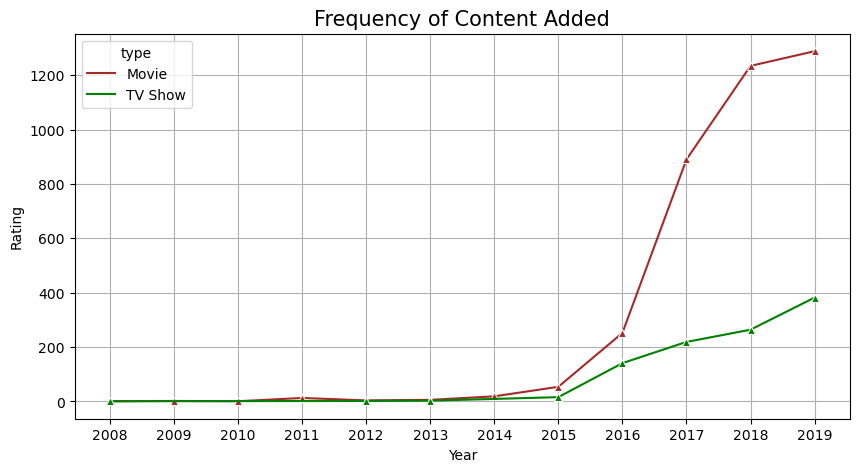

In [116]:
plt.figure(figsize=(10,5))

sns.lineplot(data=x, x='year', y='rating', hue='type', sort=True, marker='^', palette={'Movie': 'brown', 'TV Show': 'green'})

plt.title('Frequency of Content Added', size=15)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.grid()
plt.show()

Comment：the dataset shows years from 2008 to 2019. Netflix started rapidly take in movies since 2016, where they take around 600 moviews in the single year of 2016 to 2017. While the show has a steady increase around 100 shows each year from 2014 to 2019.

advise: netflix 从tv到movies 比例

frequency by month: holiday season is higher, make another graph 

In [ ]:
word cloud optional, https://www.datacamp.com/tutorial/wordcloud-python

In summary:

- Netflix primarily focuses on adult-oriented content, with top-rated categories being TV-14, TV-MA, and TV-PG.

- Movies constitute about 75% of Netflix's content, emphasizing a strong preference for movie-centric offerings.

- Despite the movie emphasis, Netflix maintains a consistent focus on adult content across both movies and TV shows.

- Notable exceptions are TV-Y7 and TV-Y7-FV, indicating a targeted effort towards children's programming.

- The United States remains Netflix's primary market, followed by India, the United Kingdom, Japan, and Korea.

- Content growth shows a significant increase in movies starting from 2016, while TV shows exhibit a steady rise from 2014 to 2019.